# Data & Packages load


In [1]:
from utils import *

import numpy as np
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
from tensorflow.keras.layers import Dense, Bidirectional, Dropout, Flatten
from tensorflow.keras import optimizers
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

%matplotlib inline

In [2]:
# curves_path = "./data_folder/curves_fitted.pkl"
# curves_fitted = pd.read_pickle(curves_path)

curves_path = "./data_folder/curves_RNN_norm_aug.npy"
types_path = "./data_folder/types_RNN_norm_aug.npy"

curves_RNN = np.load(curves_path, mmap_mode='r')
types = np.load(types_path)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(curves_RNN, types,
                                                    train_size=0.7,
                                                    random_state=42)

In [4]:
n_obs, seq_len, feat = X_train.shape
X_train.shape

(1527064, 100, 5)

In [5]:
del curves_RNN

# Model: 1 layer & 1 neuron
---


## SimpleRNN

In [6]:
model_1l_1simpleRNN = Sequential()
model_1l_1simpleRNN.add(SimpleRNN(1, input_shape=(seq_len, feat),
                                  return_sequences=True, dropout=0.2))
model_1l_1simpleRNN.add(BatchNormalization())
model_1l_1simpleRNN.add(Flatten())
model_1l_1simpleRNN.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_1l_1simpleRNN.compile(loss='binary_crossentropy',
                            optimizer=optimizer,
                            metrics=['accuracy'])
model_1l_1simpleRNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100, 1)            7         
                                                                 
 batch_normalization (BatchN  (None, 100, 1)           4         
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 112
Trainable params: 110
Non-trainable params: 2
_________________________________________________________________


In [7]:
history_1l_1simpleRNN = model_1l_1simpleRNN.fit(X_train, y_train,
                                                validation_data=(X_test, y_test),
                                                epochs=30, batch_size=128)
predict_1l_1simpleRNN = model_1l_1simpleRNN.predict(X_test)

Epoch 1/30
11931/11931 [==============================] - 128s 11ms/step - loss: 0.3163 - accuracy: 0.8764 - val_loss: 0.2872 - val_accuracy: 0.8949
Epoch 2/30
11931/11931 [==============================] - 108s 9ms/step - loss: 0.2969 - accuracy: 0.8864 - val_loss: 0.2837 - val_accuracy: 0.8948
Epoch 3/30
11931/11931 [==============================] - 107s 9ms/step - loss: 0.2951 - accuracy: 0.8870 - val_loss: 0.2837 - val_accuracy: 0.8957
Epoch 4/30
11931/11931 [==============================] - 107s 9ms/step - loss: 0.2941 - accuracy: 0.8872 - val_loss: 0.2824 - val_accuracy: 0.8955
Epoch 5/30
11931/11931 [==============================] - 89s 7ms/step - loss: 0.2938 - accuracy: 0.8872 - val_loss: 0.2828 - val_accuracy: 0.8949
Epoch 6/30
11931/11931 [==============================] - 90s 8ms/step - loss: 0.2932 - accuracy: 0.8875 - val_loss: 0.2817 - val_accuracy: 0.8946
Epoch 7/30
11931/11931 [==============================] - 90s 8ms/step - loss: 0.2926 - accuracy: 0.8876 - val_lo

Text(0.5, 1.0, '1 layer - 1 simpleRNN')

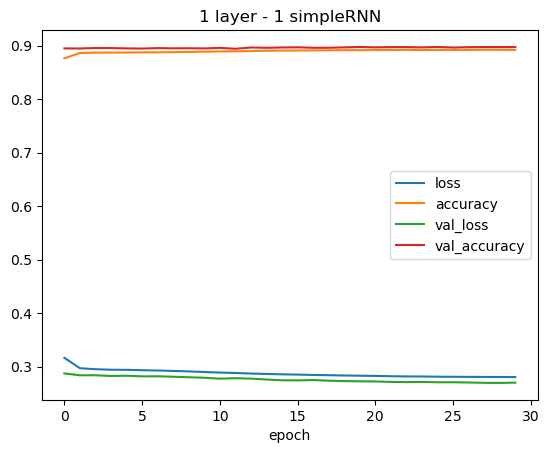

In [8]:
ax = pd.DataFrame(history_1l_1simpleRNN.history).plot()
ax.set_xlabel('epoch')
ax.set_title('1 layer - 1 simpleRNN')

Normalized confusion matrix


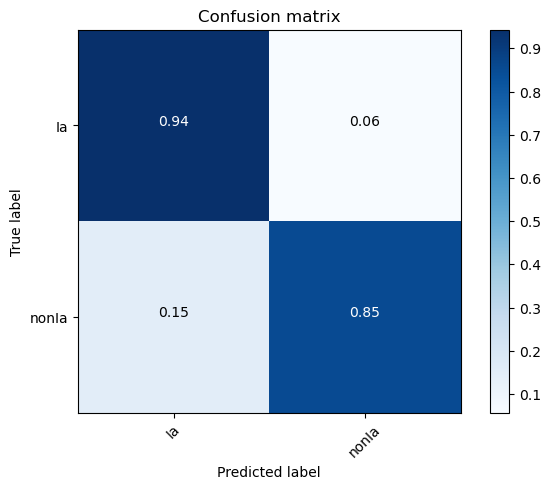

In [9]:
plot_confusion_matrix(y_test, predict_1l_1simpleRNN.round(), ['Ia', 'nonIa'], normalize=True)

AUC = 0.8974469851335365


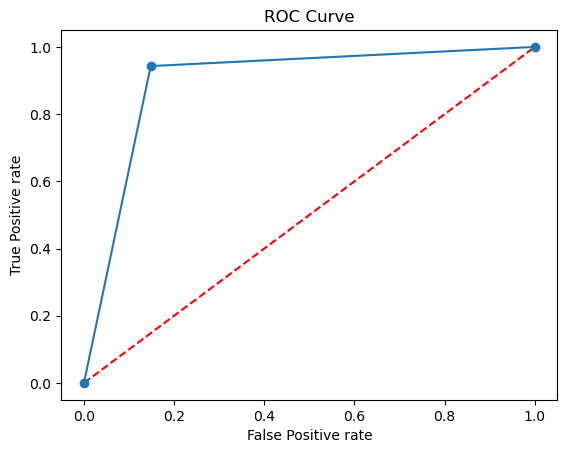

In [10]:
plot_roc_curve(y_test, predict_1l_1simpleRNN.round(), auc_print=True)

In [11]:
acc_1l_1simpleRNN = model_1l_1simpleRNN.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_1l_1simpleRNN[1] * 100 : 0.2f}%')

accuracy:  89.75%


## LSTM

In [ ]:
model_1l_1LSTM = Sequential()
model_1l_1LSTM.add(LSTM(1, input_shape=(seq_len, feat),
                        return_sequences=True, dropout=0.2))
model_1l_1LSTM.add(BatchNormalization())
model_1l_1LSTM.add(Flatten())
model_1l_1LSTM.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_1l_1LSTM.compile(loss='binary_crossentropy',
                       optimizer=optimizer,
                       metrics=['accuracy'])
model_1l_1LSTM.summary()

In [ ]:
history_1l_1LSTM = model_1l_1LSTM.fit(X_train, y_train,
                                     validation_data=(X_test, y_test),
                                     epochs=30, batch_size=128)
predict_1l_1LSTM = model_1l_1LSTM.predict(X_test)

In [ ]:
pd.DataFrame(history_1l_1LSTM.history).plot()

In [ ]:
plot_confusion_matrix(y_test, predict_1l_1LSTM.round(), ['Ia', 'nonIa'], normalize=True)

In [ ]:
plot_roc_curve(y_test, predict_1l_1LSTM.round(), auc_print=True)

In [ ]:
acc_1l_1LSTM = model_1l_1LSTM.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_1l_1LSTM[1] * 100 : 0.2f}%')

## GRU

In [ ]:
model_1l_1GRU = Sequential()
model_1l_1GRU.add(GRU(1, input_shape=(seq_len, feat),
                      return_sequences=True, dropout=0.2))
model_1l_1GRU.add(BatchNormalization())
model_1l_1GRU.add(Flatten())
model_1l_1GRU.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_1l_1GRU.compile(loss='binary_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])
model_1l_1GRU.summary()

In [ ]:
history_1l_1GRU = model_1l_1GRU.fit(X_train, y_train,
                                   validation_data=(X_test, y_test),
                                   epochs=30, batch_size=128)
predict_1l_1GRU = model_1l_1GRU.predict(X_test)

In [ ]:
pd.DataFrame(history_1l_1GRU.history).plot()

In [ ]:
plot_confusion_matrix(y_test, predict_1l_1GRU.round(), ['Ia', 'nonIa'], normalize=True)

In [ ]:
plot_roc_curve(y_test, predict_1l_1GRU.round(), auc_print=True)

In [ ]:
acc_1l_1GRU = model_1l_1GRU.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_1l_1GRU[1] * 100 : 0.2f}%')

## Results

- SimpleRNN: slow train
- LSTM & GRU: accurate considering only 1 neuron
  - LSTM:
    - 98% Ia - 94% NonIa 
    - work better with default _lr_ ~_lr = 1e-3_~
  - GRU:
    - 94% Ia - 88% NonIa 
    - work better with default _lr_ ~_lr = 5e-4_~

# Model: 1 bidirectional layer & 1 neuron
---

## LSTM

In [ ]:
model_1bl_1LSTM = Sequential()
model_1bl_1LSTM.add(Bidirectional(LSTM(1, return_sequences=True, dropout=0.2),
                                  input_shape=(seq_len, feat)))
model_1bl_1LSTM.add(BatchNormalization())
model_1bl_1LSTM.add(Flatten())
model_1bl_1LSTM.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_1bl_1LSTM.compile(loss='binary_crossentropy',
                       optimizer=optimizer,
                       metrics=['accuracy'])
model_1bl_1LSTM.summary()

In [ ]:
history_1bl_1LSTM = model_1bl_1LSTM.fit(X_train, y_train,
                                     validation_data=(X_test, y_test),
                                     epochs=30, batch_size=128)
predict_1bl_1LSTM = model_1bl_1LSTM.predict(X_test)

In [ ]:
pd.DataFrame(history_1bl_1LSTM.history).plot()

In [ ]:
plot_confusion_matrix(y_test, predict_1bl_1LSTM.round(), ['Ia', 'nonIa'], normalize=True)

In [ ]:
plot_roc_curve(y_test, predict_1bl_1LSTM.round(), auc_print=True)

In [ ]:
acc_1bl_1LSTM = model_1bl_1LSTM.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_1bl_1LSTM[1] * 100 : 0.2f}%')

## GRU

In [ ]:
model_1bl_1GRU = Sequential()
model_1bl_1GRU.add(Bidirectional(GRU(1, return_sequences=True, dropout=0.2),
                                 input_shape=(seq_len, feat)))
model_1bl_1GRU.add(BatchNormalization())
model_1bl_1GRU.add(Flatten())
model_1bl_1GRU.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_1bl_1GRU.compile(loss='binary_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])
model_1bl_1GRU.summary()

In [ ]:
history_1bl_1GRU = model_1bl_1GRU.fit(X_train, y_train,
                                      validation_data=(X_test, y_test),
                                      epochs=30, batch_size=128)
predict_1bl_1GRU = model_1bl_1GRU.predict(X_test)

In [ ]:
pd.DataFrame(history_1bl_1GRU.history).plot()

In [ ]:
plot_confusion_matrix(y_test, predict_1bl_1GRU.round(), ['Ia', 'nonIa'], normalize=True)

In [ ]:
plot_roc_curve(y_test, predict_1bl_1GRU.round(), auc_print=True)

In [ ]:
acc_1bl_1GRU = model_1bl_1GRU.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_1bl_1GRU[1] * 100 : 0.2f}%')

## Results

- LSTM & GRU: accuracy improve using bidirectional layer

  - LSTM: 94% Ia - 98% NonIa
  - GRU: 98% Ia - 94% NonIa

# Model: 1 bidirectional layer & 4 neurons
---

## LSTM 


In [6]:
model_1bl_4LSTM = Sequential()
model_1bl_4LSTM.add(Bidirectional(LSTM(4, return_sequences=True, dropout=0.2),
                                  input_shape=(seq_len, feat)))
model_1bl_4LSTM.add(BatchNormalization())
model_1bl_4LSTM.add(Flatten())
model_1bl_4LSTM.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_1bl_4LSTM.compile(loss='binary_crossentropy',
                        optimizer=optimizer,
                        metrics=['accuracy'])
model_1bl_4LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100, 8)           320       
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 100, 8)           32        
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 1)                 801       
                                                                 
Total params: 1,153
Trainable params: 1,137
Non-trainable params: 16
_________________________________________________________________


In [7]:
history_1bl_4LSTM = model_1bl_4LSTM.fit(X_train, y_train,
                                     validation_data=(X_test, y_test),
                                     epochs=30, batch_size=128)
predict_1bl_4LSTM = model_1bl_4LSTM.predict(X_test)

Epoch 1/30
11931/11931 [==============================] - 318s 26ms/step - loss: 0.2356 - accuracy: 0.9144 - val_loss: 0.1917 - val_accuracy: 0.9379
Epoch 2/30
11931/11931 [==============================] - 285s 24ms/step - loss: 0.1875 - accuracy: 0.9353 - val_loss: 0.2177 - val_accuracy: 0.9174
Epoch 3/30
11931/11931 [==============================] - 287s 24ms/step - loss: 0.1687 - accuracy: 0.9416 - val_loss: 0.2322 - val_accuracy: 0.9049
Epoch 4/30
11931/11931 [==============================] - 269s 23ms/step - loss: 0.1582 - accuracy: 0.9445 - val_loss: 0.1474 - val_accuracy: 0.9521
Epoch 5/30
11931/11931 [==============================] - 287s 24ms/step - loss: 0.1518 - accuracy: 0.9468 - val_loss: 0.1552 - val_accuracy: 0.9472
Epoch 6/30
11931/11931 [==============================] - 310s 26ms/step - loss: 0.1498 - accuracy: 0.9473 - val_loss: 0.1673 - val_accuracy: 0.9407
Epoch 7/30
11931/11931 [==============================] - 311s 26ms/step - loss: 0.1474 - accuracy: 0.9484

<AxesSubplot:>

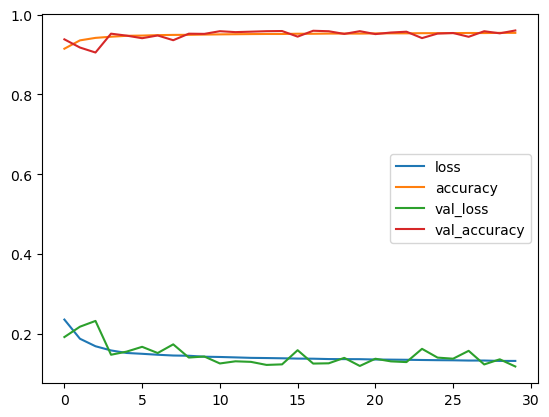

In [8]:
pd.DataFrame(history_1bl_4LSTM.history).plot()

Normalized confusion matrix


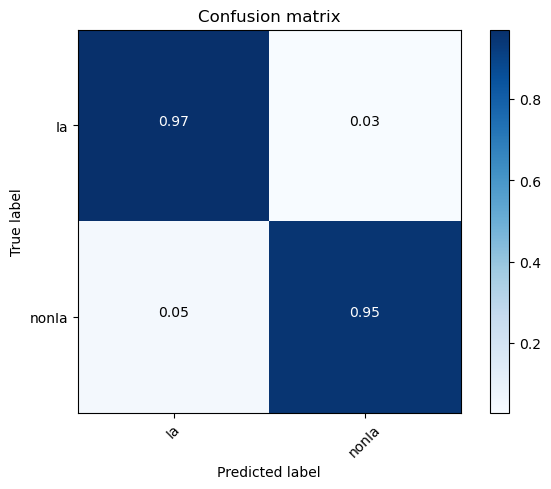

In [13]:
plot_confusion_matrix(y_test, predict_1bl_4LSTM.round(), ['Ia', 'nonIa'], normalize=True)

AUC = 0.9600995688354205


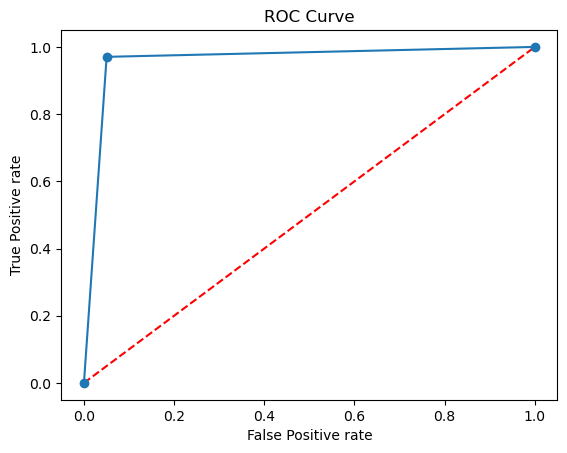

In [10]:
plot_roc_curve(y_test, predict_1bl_4LSTM.round(), auc_print=True)

In [1]:
acc_1bl_4LSTM = model_1bl_4LSTM.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_1bl_4LSTM[1] * 100 : 0.2f}%')

accuracy:  96.01%


In [14]:
model_1bl_4LSTM.save("./data_folder/model_1bl_4LSTM.keras")

## GRU

In [ ]:
model_1bl_4GRU = Sequential()
model_1bl_4GRU.add(Bidirectional(GRU(4, return_sequences=True, dropout=0.2),
                                 input_shape=(seq_len, feat)))
model_1bl_4GRU.add(BatchNormalization())
model_1bl_4GRU.add(Flatten())
model_1bl_4GRU.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_1bl_4GRU.compile(loss='binary_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])
model_1bl_4GRU.summary()

In [ ]:
history_1bl_4GRU = model_1bl_4GRU.fit(X_train, y_train,
                                      validation_data=(X_test, y_test),
                                      epochs=30, batch_size=128)
predict_1bl_4GRU = model_1bl_4GRU.predict(X_test)

In [ ]:
pd.DataFrame(history_1bl_4GRU.history).plot()

In [ ]:
plot_confusion_matrix(y_test, predict_1bl_4GRU.round(), ['Ia', 'nonIa'], normalize=True)

In [ ]:
plot_roc_curve(y_test, predict_1bl_4GRU.round(), auc_print=True)

In [ ]:
acc_1bl_4GRU = model_1bl_4GRU.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_1bl_4GRU[1] * 100 : 0.2f}%')

# Model: 1 bidirectional layer & 64 neurons
---

## LSTM

In [ ]:
model_1bl_64LSTM = Sequential()
model_1bl_64LSTM.add(Bidirectional(LSTM(64, return_sequences=True, dropout=0.2),
                                   input_shape=(seq_len, feat)))
model_1bl_64LSTM.add(BatchNormalization())
model_1bl_64LSTM.add(Flatten())
model_1bl_64LSTM.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_1bl_64LSTM.compile(loss='binary_crossentropy',
                         optimizer=optimizer,
                         metrics=['accuracy'])
model_1bl_64LSTM.summary()

In [ ]:
history_1bl_64LSTM = model_1bl_64LSTM.fit(X_train, y_train,
                                          validation_data=(X_test, y_test),
                                          epochs=30, batch_size=128)
predict_1bl_64LSTM = model_1bl_64LSTM.predict(X_test)

In [ ]:
pd.DataFrame(history_1bl_64LSTM.history).plot()

In [ ]:
plot_confusion_matrix(y_test, predict_1bl_64LSTM.round(), ['Ia', 'nonIa'], normalize=True)

In [ ]:
plot_roc_curve(y_test, predict_1bl_64LSTM.round(), auc_print=True)

In [ ]:
acc_1bl_64LSTM = model_1bl_64LSTM.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_1bl_64LSTM[1] * 100 : 0.2f}%')

## GRU

In [ ]:
model_1bl_64GRU = Sequential()
model_1bl_64GRU.add(Bidirectional(GRU(64, return_sequences=True, dropout=0.2),
                                  input_shape=(seq_len, feat)))
model_1bl_64GRU.add(BatchNormalization())
model_1bl_64GRU.add(Flatten())
model_1bl_64GRU.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_1bl_64GRU.compile(loss='binary_crossentropy',
                        optimizer=optimizer,
                        metrics=['accuracy'])
model_1bl_64GRU.summary()

In [ ]:
history_1bl_64GRU = model_1bl_64GRU.fit(X_train, y_train,
                                        validation_data=(X_test, y_test),
                                        epochs=30, batch_size=128)
predict_1bl_64GRU = model_1bl_64GRU.predict(X_test)

In [ ]:
pd.DataFrame(history_1bl_64GRU.history).plot()

In [ ]:
plot_confusion_matrix(y_test, predict_1bl_64GRU.round(), ['Ia', 'nonIa'], normalize=True)

In [ ]:
plot_roc_curve(y_test, predict_1bl_64GRU.round(), auc_print=True)

In [ ]:
acc_1bl_64GRU = model_1bl_64GRU.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_1bl_64GRU[1] * 100 : 0.2f}%')

# Model: 2 bidirectional layer & 4 neurons
---
- 2 per layer

## LSTM

In [ ]:
model_2bl_4LSTM = Sequential()
model_2bl_4LSTM.add(Bidirectional(LSTM(2, return_sequences=True, dropout=0.2),
                                  input_shape=(seq_len, feat)))
model_2bl_4LSTM.add(BatchNormalization())

model_2bl_4LSTM.add(Bidirectional(LSTM(2, return_sequences=True, dropout=0.2),
                                  input_shape=(seq_len, feat)))
model_2bl_4LSTM.add(Flatten())
model_2bl_4LSTM.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_2bl_4LSTM.compile(loss='binary_crossentropy',
                       optimizer=optimizer,
                       metrics=['accuracy'])
model_2bl_4LSTM.summary()

In [ ]:
history_2bl_4LSTM = model_2bl_4LSTM.fit(X_train, y_train,
                                      validation_data=(X_test, y_test),
                                      epochs=30, batch_size=128)
predict_2bl_4LSTM = model_2bl_4LSTM.predict(X_test)

In [ ]:
pd.DataFrame(history_2bl_4LSTM.history).plot()

In [ ]:
plot_confusion_matrix(y_test, predict_2bl_4LSTM.round(), ['Ia', 'nonIa'], normalize=True)

In [ ]:
plot_roc_curve(y_test, predict_2bl_4LSTM.round(), auc_print=True)

In [ ]:
acc_2bl_4LSTM = model_2bl_4LSTM.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_2bll_4LSTM[1] * 100 : 0.2f}%')

## GRU

In [ ]:
model_2bl_4GRU= Sequential()
model_2bl_4GRU.add(Bidirectional(GRU(2, return_sequences=True, dropout=0.2),
                                 input_shape=(seq_len, feat)))
model_2bl_4GRU.add(BatchNormalization())

model_2bl_4GRU.add(Bidirectional(GRU(2, return_sequences=True, dropout=0.2),
                                 input_shape=(seq_len, feat)))
model_2bl_4GRU.add(Flatten())
model_2bl_4GRU.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_2bl_4GRU.compile(loss='binary_crossentropy',
                       optimizer=optimizer,
                       metrics=['accuracy'])
model_2bl_4GRU.summary()

In [ ]:
history_2bl_4GRU= model_2bl_4GRU.fit(X_train, y_train,
                                     validation_data=(X_test, y_test),
                                     epochs=30, batch_size=128)
predict_2bl_4GRU = model_2bl_4GRU.predict(X_test)

In [ ]:
pd.DataFrame(history_2bl_4GRU.history).plot()

In [ ]:
plot_confusion_matrix(y_test, predict_2bl_4GRU.round(), ['Ia', 'nonIa'], normalize=True)

In [ ]:
plot_roc_curve(y_test, predict_2bl_4GRU.round(), auc_print=True)

In [ ]:
acc_2bl_4GRU = model_2bl_4GRU.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_2bl_4GRU[1] * 100 : 0.2f}%')